In [1]:
import pandas as pd
import ipyleaflet
import os
from ipyleaflet import *
import geopandas as gpd
import requests
import json
import geojson
import shape
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from ggplot import *


plotly.tools.set_credentials_file(username='jwageman', api_key='5PezVLXcM1KdQn4F3kWt')

In [2]:
# allow Jupyter notebooks to access external connection withou HTTPS
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
os.getcwd()
os.chdir('/Users/julia_wagemann/Documents/github/survey_analysis/')

In [4]:
survey = pd.read_csv('20190131_final_results.csv', encoding="ISO-8859-1")

In [5]:
survey

,1.1 What is your country of residence?,1.2 Your company / institution,1.3 Your current position,1.4 What is your age:,2.1 What sector do you work in?,Please specify:,What is your annual revenue in Euro or US Dollars?,Please specify:.1,2.2 Who do you most identify with?,Please specify:.2,...,6.7 Would you be able to estimate the technical requirements you would need for your data storage and/or processing tasks in the cloud?,"If yes, please specify: data volume to store in GB, Number of cloud instances / virtual servers to parallelise tasks, required memory per instance, required number of cores, any other requirements / specifications, e.g. need for a specialised network?","6.8 Would you be willing to pay for processing services in the cloud, if you get directly the output you are interested in?",What would you be willing to pay for?,Please specify:.19,How much would you be willing to pay?,7.1 Do you have any further comments?,7.2 Would you be available as an expert for a follow-up expert interview?,7.3 Would you like to be informed about the outcomes of this survey?,Please specify your email address:
0,United Kingdom,NaN,Developer,30 - 40 years,Non-profit,NaN,NaN,NaN,Data user,Software Developer,...,No,NaN,Depends on the cost,Data storage,NaN,"up to 1,000 Euros / 1,000 US Dollars",NaN,Yes,Yes,olcl@pml.ac.uk
1,United Kingdom,University of Bath,Research associate,20 - 30 years,University,Public research institute,NaN,NaN,Data user,Researcher,...,No,NaN,No,NaN,NaN,NaN,No,No,No,NaN
2,Austria,University of Natural resources and life scien...,Postdoc,30 - 40 years,University,Public research institute,NaN,NaN,Data user,Researcher,...,No,NaN,No,NaN,NaN,NaN,NaN,No,Yes,mathew.herrnegger@boku.ac.at
3,Italy,FAO of UN,Information Systems Officer,50 - 60 years,Non-profit,NaN,NaN,NaN,Data user,Project manager,...,No,NaN,Depends on the cost,Data download;Data storage;Service support,NaN,I prefer a costing model based on a monthly/an...,NaN,No,No,NaN
4,Italy,Food and Agriculture Organization of the UN,Consultant,20 - 30 years,Intergovernmental organisation,NaN,NaN,NaN,Data user,Data Analyst,...,No,NaN,No,NaN,NaN,NaN,NaN,No,No,NaN
5,Portugal,NaN,Earth Observation Data Planner,30 - 40 years,Intergovernmental organisation,NaN,NaN,NaN,Data provider,NaN,...,No,NaN,Yes,Data processing;Data storage,NaN,I prefer a costing model based on a monthly/an...,There is one more requirement we have not addr...,No,Yes,paula.marti@gmail.com
6,United States of America,Columbia University,Associate Professor,30 - 40 years,University,Private research institute,NaN,NaN,Data user,Researcher,...,No,NaN,Yes,Data processing,NaN,I prefer a costing model based on a monthly/an...,This survey was somewhat biased in it's charac...,Yes,Yes,rpa@ldeo.columbia.edu
7,Australia,Spatialised,owner/principal consultant,40 - 50Â years,University;Intergovernmental organisation;Gove...,Private research institute,unsure at this point,"pretty much everyone, currently have contracts...",Data user,Other,...,Yes,data volume: hundreds of TB (eventually). the ...,Yes,Data processing;Data storage;Service support,NaN,I prefer a costing model based on a monthly/an...,This was an interesting survey! A few question...,Yes,Yes,adam@spatialised.net
8,United Kingdom,University of Bath,Research Fellow,30 - 40 years,University,Public research institute,NaN,NaN,Data user,Researcher,...,No,NaN,No,NaN,NaN,NaN,NaN,Yes,Yes,c.wright@bath.ac.uk
9,United States of America,ClimaCell,Chief Scientist,20 - 30 years,Start-up,NaN,"$400,000",NaN,Data user,Team leader,...,Yes,Data volume - ~100 TB\r\nI would like to use t...,Yes,Data download;Data storage,NaN,I prefer a costing model based on a monthly/an...,NaN,Yes,Yes,daniel@climacell.co


In [7]:
def valueCount(df, column, column_name):
    tmp = df.iloc[:,column]
    tmp_counts = tmp.value_counts(sort=False).to_frame()
    tmp_counts[column_name] = tmp_counts.index
    tmp_counts.columns=["count",column_name]
    return tmp_counts

#country = survey.iloc[:,0]
#df_country_counts = country.value_counts().to_frame()
#df_country_counts['COUNTRY'] = df_country_counts.index



#df_country_counts.columns = ['count','COUNTRY']

In [6]:
def valueCount(df,column,dropna,sort):
    tmp = df.iloc[:,column]
    counts = tmp.value_counts(dropna=dropna,sort=sort)
    perc = tmp.value_counts(dropna=dropna,normalize=True)
    return pd.concat([counts,perc], axis=1, keys=['counts','%'])

## Section 1 - Value count analysis

### 1.1 What is your country of residence?

In [7]:
df_country_counts = valueCount(survey,0,False,True)
df_country_counts.reset_index()

,index,counts,%
0,Germany,50,0.234742
1,United States of America,29,0.136150
2,United Kingdom,19,0.089202
3,Italy,15,0.070423
4,Canada,13,0.061033
5,Spain,12,0.056338
6,Austria,10,0.046948
7,Switzerland,6,0.028169
8,India,5,0.023474
9,France,5,0.023474


In [8]:
data = [go.Bar(x=['Germany', 'United States of America','United Kingdom','Italy','Canada','Spain','Austria','Switzerland','France','India','Norway'],y=df_country_counts['counts'][0:11])]

py.iplot(data, filename='country_of_residence')

In [10]:
reset = df_country_counts.reset_index()
reset

,index,counts,%
0,Germany,50,0.234742
1,United States of America,29,0.136150
2,United Kingdom,19,0.089202
3,Italy,15,0.070423
4,Canada,13,0.061033
5,Spain,12,0.056338
6,Austria,10,0.046948
7,Switzerland,6,0.028169
8,India,5,0.023474
9,France,5,0.023474


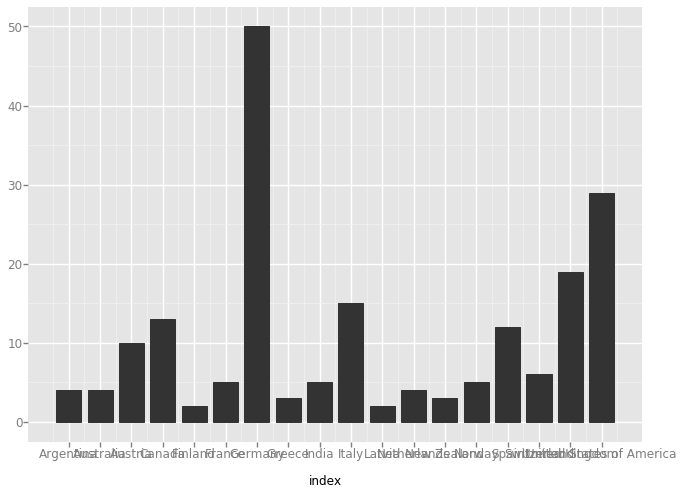

<ggplot: (300942726)>

In [12]:
ggplot(aes(x='index', weight='counts'),reset[:-20]) + geom_bar()

### 1.4 What is your age?

In [15]:
df_age_counts = valueCount(survey,3,False,True)
reset_age_groups = df_age_counts.reset_index().reindex([6,3,0,1,2,4,5]).dropna()
df_age_counts

,counts,%
30 - 40 years,92,0.431925
40 - 50Â years,54,0.253521
50 - 60 years,30,0.140845
20 - 30 years,28,0.131455
> 60 years,4,0.018779
NaN,3,0.014085
< 20 years,2,0.009390


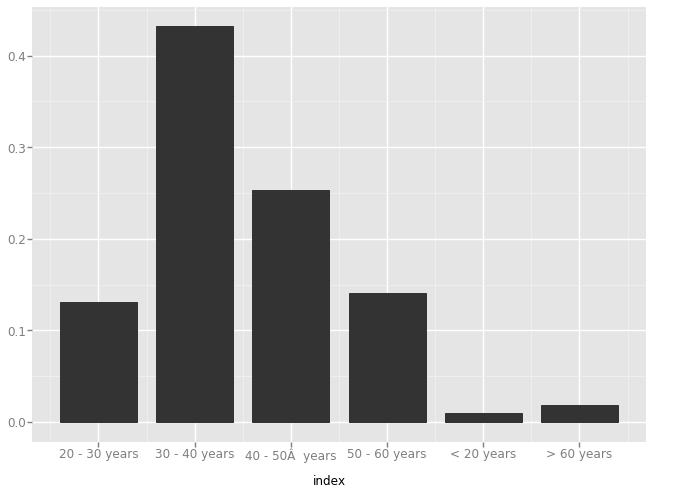

<ggplot: (300942768)>

In [16]:
age_plot = ggplot(aes(x='index',weight='%'),reset_age_groups) + geom_bar()
age_plot

### 2.1 What sector do you work in?

In [17]:
df_sector_counts = valueCount(survey,4,False,True)
df_sector_counts

,counts,%
University,79,0.370892
Established company,36,0.169014
Government,36,0.169014
Intergovernmental organisation,15,0.070423
Non-profit,14,0.065728
Other,10,0.046948
Start-up,5,0.023474
University;Government,4,0.018779
University;Non-profit,3,0.014085
University;Intergovernmental organisation;Government,2,0.009390


### 2.2 Data user vs. Data provider

In [18]:
df_data_user_counts = valueCount(survey,8,False,True)
df_data_user_counts

,counts,%
Data user,155,0.727700
Data provider,35,0.164319
Other,23,0.107981


In [19]:
df_data_user_groups = valueCount(survey,9, True,True)
df_data_user_groups

,counts,%
Researcher,75,0.483871
Data Scientist,30,0.193548
Data Analyst,15,0.096774
Team leader,12,0.077419
Software Developer,11,0.070968
Project manager,6,0.038710
Student,4,0.025806
Other,2,0.012903


In [20]:
df_data_provider_groups = valueCount(survey,10, True,True)
df_data_provider_groups

,counts,%
Researcher,11,0.314286
System architect,6,0.171429
Data Manager,6,0.171429
Project manager,5,0.142857
Other,3,0.085714
Team leader,3,0.085714
Data Steward,1,0.028571


### 3. What kind of data do you currently use

In [21]:
final_table = pd.DataFrame()
col_no = [13,14,15,16,17,18,19,20]
data_ls = ['Climate reanalysis - e.g. ERA5', 'Meteorological forecast data', 'Seasonal forecast data', 
           'Environmental forecast data','EO data', 'Other Geospatial data', 'Value-added products', 'Other']
for i,j in zip(col_no,data_ls):
    series = survey.iloc[:,i]
    series_split = series.str.split(';',n=1, expand=True)

    table = valueCount(series_split,0,False,False)
    tmp = table.iloc[1:,:].transpose()
    tmp.index.values[0]=j
    
    final_table = final_table.append(tmp, ignore_index=False)

final_table


/Users/julia_wagemann/.virtualenvs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Dataset I currently use,Dataset I would like to use in the future
Climate reanalysis - e.g. ERA5,102.000000,58.000000
%,0.478873,0.272300
Meteorological forecast data,89.000000,52.000000
%,0.417840,0.244131
Seasonal forecast data,44.000000,73.000000
%,0.206573,0.342723
Environmental forecast data,49.000000,71.000000
%,0.230047,0.333333
EO data,157.000000,36.000000
%,0.737089,0.169014


In [22]:
reset_data_use = final_table.reset_index()
percentages =reset_data_use.loc[[1,3,5,7,9,11,13,15]]
test = percentages.rename(index={1:'Climate reanalysis, e.g. ERA5', 3:'Meteorological forecast data', 5:'Seasonal forecast data', 7:'Environmental forecast data', 9:'EO data', 11:'Other Geospatial data', 13:'Value-added products', 15:'Other'}).reset_index()
test

,level_0,index,Dataset I currently use,Dataset I would like to use in the future
0,"Climate reanalysis, e.g. ERA5",%,0.478873,0.272300
1,Meteorological forecast data,%,0.417840,0.244131
2,Seasonal forecast data,%,0.206573,0.342723
3,Environmental forecast data,%,0.230047,0.333333
4,EO data,%,0.737089,0.169014
5,Other Geospatial data,%,0.676056,0.098592
6,Value-added products,%,0.516432,0.230047
7,Other,%,0.070423,0.014085


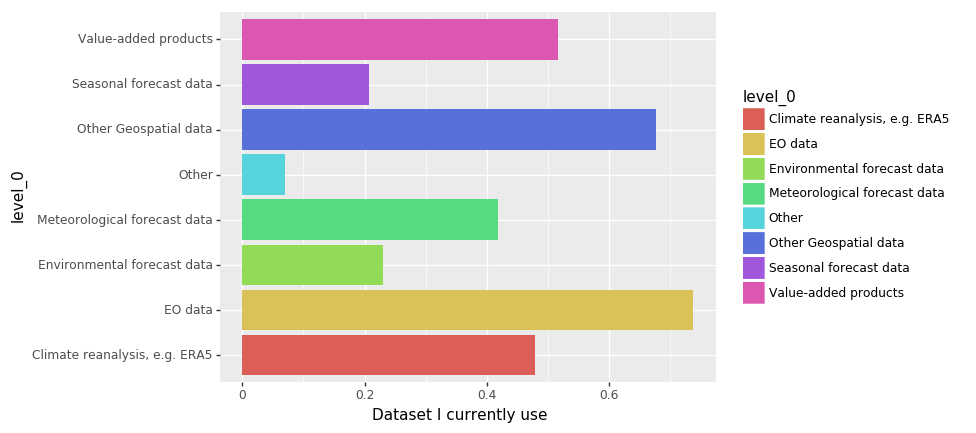

<ggplot: (-9223372036553711777)>

In [23]:
from plotnine import *
test_plot = ggplot(aes(x='level_0', y='Dataset I currently use', fill='level_0'),test) + geom_col() + coord_flip()
test_plot

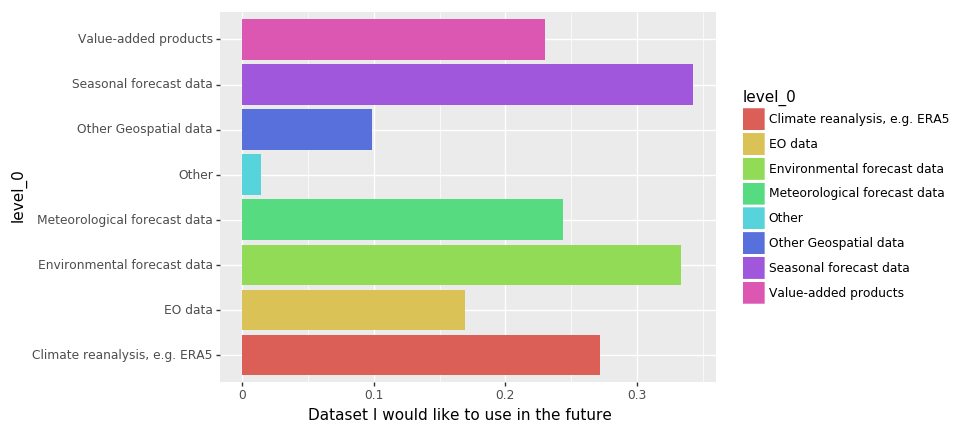

<ggplot: (304218323)>

In [24]:
from plotnine import *
test_plot2 = ggplot(aes(x='level_0', y='Dataset I would like to use in the future', fill='level_0'),test) + geom_col() + coord_flip()
test_plot2

In [33]:
multiindex_test = pd.MultiIndex.from_frame(test)
multiindex_test

MultiIndex(levels=[['Climate reanalysis, e.g. ERA5', 'EO data', 'Environmental forecast data', 'Meteorological forecast data', 'Other', 'Other Geospatial data', 'Seasonal forecast data', 'Value-added products'], ['%'], [0.07042253521126761, 0.20657276995305165, 0.2300469483568075, 0.41784037558685444, 0.4788732394366197, 0.5164319248826291, 0.676056338028169, 0.7370892018779343], [0.014084507042253521, 0.09859154929577464, 0.16901408450704225, 0.2300469483568075, 0.24413145539906103, 0.27230046948356806, 0.3333333333333333, 0.3427230046948357]],
           codes=[[0, 3, 6, 2, 1, 5, 7, 4], [0, 0, 0, 0, 0, 0, 0, 0], [4, 3, 1, 2, 7, 6, 5, 0], [5, 4, 7, 6, 2, 1, 3, 0]],
           names=['level_0', 'index', 'Dataset I currently use', 'Dataset I would like to use in the future'])

In [ ]:
test_plot3 = ggplot(aes(x='level_0', y='Dataset I would like to use in the future', fill='level_0'),multiindex_test) + geom_col() + coord_flip()
test_plot2

### 3.2 What hindered you to work with the data so far?

In [295]:
series = survey.iloc[:,22]
series_split = series.str.split(';',n=5, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)

In [296]:
table['percent'] = table.iloc[:,6:]/213 * 100
table

,0,1,2,3,4,5,sum,percent
Data formats are too cumbersome to use,5,10.0,17.0,9.0,8.0,NaN,49.0,23.004695
Data quantity and volume is too large,26,40.0,14.0,NaN,NaN,NaN,80.0,37.558685
Downloading data is uncomfortable,43,27.0,NaN,NaN,NaN,NaN,70.0,32.863850
I don't know where to find the data,11,17.0,14.0,9.0,1.0,NaN,52.0,24.413146
Other,13,5.0,3.0,1.0,NaN,1.0,23.0,10.798122
Time constraints,87,NaN,NaN,NaN,NaN,NaN,87.0,40.845070
Tools for analysis / processing of data are lacking or too complex,16,29.0,20.0,5.0,NaN,NaN,70.0,32.863850


### 3.3 What do you use the data for?

In [294]:
data_use_area = valueCount(survey,24,False,True)
data_use_area

,counts,%
Research,107,0.502347
Environmental monitoring,45,0.211268
Business,31,0.145540
Other,14,0.065728
Humanitarian application,10,0.046948
NaN,6,0.028169


### 3.4 What data formats do you use or you want to use in your data analysis tasks?

In [298]:
series = survey.iloc[:,26]
series_split = series.str.split(';',n=10, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,9:]/213 * 100
table

,0,1,2,3,4,5,6,7,8,sum,percent
ASCII Grid,NaN,12.0,17.0,18.0,5.0,NaN,NaN,NaN,NaN,52.0,24.413146
CSV,2.0,18.0,47.0,34.0,27.0,5.0,NaN,NaN,NaN,133.0,62.441315
Cloud-optimised zarr,NaN,1.0,4.0,2.0,1.0,4.0,1.0,NaN,1.0,14.0,6.572770
GRIB,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,27.699531
GeoTIFF,28.0,63.0,36.0,20.0,NaN,NaN,NaN,NaN,NaN,147.0,69.014085
JPEG / PNG,4.0,4.0,7.0,13.0,17.0,14.0,3.0,NaN,NaN,62.0,29.107981
JPEG2000,NaN,NaN,3.0,10.0,12.0,10.0,7.0,NaN,NaN,42.0,19.718310
JSON / GeoJSON,34.0,32.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,94.0,44.131455
NetCDF,84.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,66.197183
Other,1.0,2.0,2.0,7.0,6.0,2.0,4.0,1.0,NaN,25.0,11.737089


### 3.6 Time investment to work with data in a complex format?

In [301]:
time_investment = valueCount(survey,36,False,True)
time_investment

,counts,%
Yes,147,0.690141
Depends,43,0.201878
No,10,0.046948
"Tried, but gave up",7,0.032864
Don't know,6,0.028169


## 4. Data handling

In [305]:
series = survey.iloc[:,44]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,9:]/213 * 100
table

,0,1,2,3,4,5,6,7,8,sum,percent
C,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,8.450704
C++,19.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,12.206573
Fortran,23.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,15.962441
Java,3.0,13.0,6.0,4.0,3.0,2.0,NaN,NaN,NaN,31.0,14.553991
Javascript,2.0,21.0,19.0,8.0,4.0,2.0,1.0,NaN,NaN,57.0,26.760563
Julia,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,1.877934
None,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.225352
Other,5.0,8.0,9.0,6.0,3.0,NaN,NaN,NaN,NaN,31.0,14.553991
PHP,NaN,2.0,2.0,4.0,2.0,1.0,2.0,1.0,NaN,14.0,6.572770
Python,108.0,41.0,11.0,4.0,NaN,NaN,NaN,NaN,NaN,164.0,76.995305


### 4.2 Do you use desktop-based software?

In [306]:
desktop_software = valueCount(survey,46,False,True)
desktop_software

,counts,%
Yes,134,0.629108
No,76,0.356808
NaN,3,0.014085


### 4.2.1 Type of desktop-based software

In [317]:
series = survey.iloc[:,47]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,7:]/213 * 100
table

,0,1,2,3,4,5,6,sum,percent
ArcGIS,14,37.0,16.0,NaN,NaN,NaN,NaN,67.0,31.455399
ENVI,1,6.0,12.0,7.0,NaN,NaN,NaN,26.0,12.206573
Excel,4,7.0,21.0,10.0,4.0,6.0,1.0,53.0,24.882629
GRASS GIS,2,35.0,NaN,NaN,NaN,NaN,NaN,37.0,17.370892
IDL,2,2.0,3.0,5.0,3.0,NaN,NaN,15.0,7.042254
Matlab,11,9.0,5.0,3.0,4.0,1.0,NaN,33.0,15.492958
Other,6,5.0,10.0,5.0,5.0,1.0,2.0,34.0,15.962441
QGIS,94,NaN,NaN,NaN,NaN,NaN,NaN,94.0,44.131455


### 4.3 How do you currently or how would you like in the future to access large volumes of Big Earth Data

In [318]:
final_table = pd.DataFrame()
col_no = [49,50,51,52,53,54,55,56]
data_ls = ['Download service',
           'Cloud computing infrastructure',
           'OGC web service',
           'Custom API or an OpenDAP service',
           'Virtual Research Environment',
           'Data cube technology',
           'Spatial or Array database',
           'Other']
for i,j in zip(col_no,data_ls):
    series = survey.iloc[:,i]
    series_split = series.str.split(';',n=1, expand=True)

    table = valueCount(series_split,0,False,False)
    tmp = table.iloc[1:,:].transpose()
    tmp.index.values[0]=j
    
    final_table = final_table.append(tmp, ignore_index=False)

final_table

/Users/julia_wagemann/.virtualenvs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
/Users/julia_wagemann/.virtualenvs/myvenv/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,I am not interested in this kind of service,I currently use this kind of service,I would like to use or continue to use this kind of service in the future
Download service,9.000000,151.000000,46.000000
%,0.042254,0.708920,0.215962
Cloud computing infrastructure,18.000000,81.000000,106.000000
%,0.084507,0.380282,0.497653
OGC web service,42.000000,73.000000,73.000000
%,0.197183,0.342723,0.342723
Custom API or an OpenDAP service,47.000000,57.000000,65.000000
%,0.220657,0.267606,0.305164
Virtual Research Environment,90.000000,10.000000,58.000000
%,0.422535,0.046948,0.272300


### 4.5 How do you process and analyse data?

In [321]:
final_table = pd.DataFrame()
col_no = [66,67,68,69,70]
data_ls = ['code-editor in the cloud',
          'code-based processing routines accessing cloud services',
          'code-based processing routines on a local machine',
          'geospatial software on a local machine',
          'Other']
for i,j in zip(col_no,data_ls):
    series = survey.iloc[:,i]
    series_split = series.str.split(';',n=1, expand=True)

    table = valueCount(series_split,0,False,False)
    tmp = table.iloc[1:,:].transpose()
    tmp.index.values[0]=j
    
    final_table = final_table.append(tmp, ignore_index=False)

final_table

/Users/julia_wagemann/.virtualenvs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Sometimes,Always,Never
code-editor in the cloud,78.000000,16.000000,100.000000
%,0.366197,0.075117,0.469484
code-based processing routines accessing cloud services,69.000000,20.000000,106.000000
%,0.323944,0.093897,0.497653
code-based processing routines on a local machine,68.000000,116.000000,15.000000
%,0.319249,0.544601,0.070423
geospatial software on a local machine,102.000000,52.000000,41.000000
%,0.478873,0.244131,0.192488
Other,7.000000,13.000000,27.000000
%,0.032864,0.061033,0.126761


## 5. Data challenges

### 5.1 What are currently the biggest obstacles accessing and working with Big Earth Data?

In [326]:
final_table = pd.DataFrame()
col_no = [80,81,82,83,84,85,86,87,88,89,90,91,92]
data_ls = ['Growing data volume',
           'Limited processing capacity',
           'Complex data formats',
           'Data are disseminated in a non-standardised way',
           'Data discovery (finding data sets)',
           'Data access systems',
           'Data complexity',
           'Combining different kind of geospatial data and shapefiles',
           'Too many data platforms and portals',
           'Data services are too restricted to access large volumes of data',
           'Lacking easy-to-use tools for access, preprocessing, visualisation and evaluation',
           'Cost of data services (cost for non-open data or cost for processing services)',
          'Other']


final_table = survey.iloc[:,80:92]

final_table

,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Growing data volume,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Limited processing capacity,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Complex data formats,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Data are disseminated in a non-standardised way,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Data discovery (finding data sets),5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Data access systems,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Data complexity,"5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Combining different kind of geospatial data, e.g. EO data with meteorological data and shapefiles",5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Too many data platforms and portals,5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Data services are too restricted to access large volumes of data,"5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Lacking easy-to-use tools for access, preprocessing, visualisation and evaluation",5.1 What are currently the biggest obstacles accessing and working with Big Earth Data? From 1 (no obstacle at all) to 5 (a great obstacle): Cost of data services (cost for non-open data or cost for processing services)
0,5.0,3.0,4.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,2.0,1.0
1,4.0,4.0,5.0,5.0,4.0,5.0,3.0,2.0,4.0,5.0,4.0,2.0
2,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,2.0
3,4.0,3.0,3.0,5.0,3.0,3.0,4.0,2.0,2.0,5.0,3.0,4.0
4,4.0,5.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0
5,5.0,5.0,3.0,3.0,3.0,3.0,2.0,1.0,5.0,4.0,4.0,5.0
6,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,5.0,2.0,2.0
7,3.0,3.0,5.0,5.0,5.0,3.0,2.0,2.0,5.0,3.0,3.0,5.0
8,5.0,5.0,4.0,3.0,5.0,3.0,1.0,1.0,5.0,5.0,1.0,1.0
9,5.0,2.0,2.0,4.0,3.0,5.0,2.0,3.0,1.0,5.0,2.0,2.0


## 6. Future data services

### 6.2 Concerning the legal policy of the cloud service, what would you prefer?

In [331]:
series = survey.iloc[:,96]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,0]/213 * 100
table

,0,sum,percent
"a publicly funded general cloud, e.g. the European initiativeÂ European Open Science Cloud (EOSC)",66,66,30.985915
I do not mind,55,55,25.821596
"a publicly funded specialised cloud, where data and tools offered are specific for a certain domain, e.g. the Copernicus DIAS reference service WEkEO",47,47,22.065728
"a commercial cloud vendor, such as Amazon Web Services, Google Cloud, Microsoft Azure or IBM Cloud",26,26,12.206573
None of the above,13,13,6.103286


### 6.3 What do you want to use the cloud for?

In [333]:
series = survey.iloc[:,97]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,4]/213 * 100
table

,0,1,2,3,sum,percent
Data access,30,135.0,NaN,NaN,165.0,77.464789
Data processing,19,37.0,112.0,NaN,168.0,78.873239
Data storage,153,NaN,NaN,NaN,153.0,71.830986
No application need,7,NaN,1.0,NaN,8.0,3.755869
Other,1,NaN,NaN,5.0,6.0,2.816901


### 6.4 When working with cloud services, which of the following statements would be true for you?

In [336]:
series = survey.iloc[:,100]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split

table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,5]/213 * 100
table

,0,1,2,3,4,sum,percent
"I would like to work in the cloud in a collaborative way, by (i) using shared libraries and open data and (ii) contributing with sharing data, workflows and/or libraries",54,63.0,33.0,NaN,NaN,150.0,70.422535
I would like to work privately on a cloud and the security of my processing tasks and / or data (processed and uploaded) is very important,66,54.0,NaN,NaN,NaN,120.0,56.338028
I would need the option to upload own datasets and combine them with available datasets on the cloud,6,63.0,70.0,26.0,NaN,165.0,77.464789
I would need to be able to transfer intermediary or final results out of the cloud and store them on my local machine,3,14.0,50.0,68.0,21.0,156.0,73.239437
"the geographic location of the cloud (e.g. Europe, US) is very important for me",79,NaN,NaN,NaN,NaN,79.0,37.089202


### 6.5 How strong do you consider the following security aspects as a risk of cloud services?

In [337]:
final_table = pd.DataFrame()
col_no = [101,102,103,104,105,106]
data_ls = ['Data integrity',
          'Data breaches',
          'Service unavailability',
          'Security of private / restricted data',
          'Other']
for i,j in zip(col_no,data_ls):
    series = survey.iloc[:,i]
    series_split = series.str.split(';',n=1, expand=True)

    table = valueCount(series_split,0,False,False)
    tmp = table.iloc[1:,:].transpose()
    tmp.index.values[0]=j
    
    final_table = bfinal_table.append(tmp, ignore_index=False)

final_table

/Users/julia_wagemann/.virtualenvs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Major risk,No risk at all,"Might be a risk, but not important for me",Risk
Data integrity,60.000000,27.000000,35.000000,85.000000
%,0.281690,0.126761,0.164319,0.399061
Data breaches,66.000000,27.000000,38.000000,77.000000
%,0.309859,0.126761,0.178404,0.361502
Service unavailability,90.000000,33.000000,12.000000,73.000000
%,0.422535,0.154930,0.056338,0.342723
Security of private / restricted data,76.000000,13.000000,21.000000,100.000000
%,0.356808,0.061033,0.098592,0.469484
Other,81.000000,19.000000,32.000000,76.000000
%,0.380282,0.089202,0.150235,0.356808


### 6.7 Would you be able to estimate the technical requirements you would need for your data storage and/or processing tasks in the cloud?

In [355]:
series = survey.iloc[:,109]
series_split = series.str.split(';',n=9, expand=True)
#print(series)

table = series_split.apply(pd.Series.value_counts)
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,0]/213 * 100
table

,0,sum,percent
No,157,157,73.708920
Yes,51,51,23.943662


### 6.8 Whould you be willing to pay for processing services in the cloud, if you get directly the output you are interested in?

In [356]:
series = survey.iloc[:,111]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split

table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,0]/213 * 100
table

,0,sum,percent
Depends on the cost,103,103,48.356808
No,59,59,27.699531
Yes,46,46,21.596244


### 6.8.1 What would you be willing to pay for?

In [357]:
series = survey.iloc[:,112]
series_split = series.str.split(';',n=9, expand=True)


table = series_split.apply(pd.Series.value_counts)
series_split
table['sum'] = table.sum(axis=1)
table['percent'] = table.iloc[:,6]/213 * 100
table

,0,1,2,3,4,5,sum,percent
Data download,10.0,35.0,NaN,NaN,NaN,NaN,45.0,21.126761
Data processing,119.0,NaN,NaN,NaN,NaN,NaN,119.0,55.868545
Data storage,14.0,56.0,12.0,21.0,NaN,NaN,103.0,48.356808
Data upload,1.0,3.0,23.0,NaN,NaN,NaN,27.0,12.676056
Other,NaN,1.0,NaN,1.0,NaN,1.0,3.0,1.408451
Service support,5.0,16.0,21.0,2.0,16.0,NaN,60.0,28.169014


### 6.8.2 How much would you be willings to pay?

In [358]:
data_use_area = valueCount(survey,114,False,True)
data_use_area

,counts,%
I prefer a costing model based on a monthly/annual subscription fee,74,0.347418
NaN,64,0.300469
up to 100 Euro / 100 US Dollars,22,0.103286
"up to 1,000 Euros / 1,000 US Dollars",19,0.089202
up to 500 Euro / 500 US Dollars,15,0.070423
"up to 10,000 Euros / 10,000 US Dollars",14,0.065728
"up to 100,000 Euros / 100,000 US Dollars",2,0.009390
"up to 50,000 Euros / 50,000 US Dollars",2,0.009390
"more than 100,000 Euros / 100,000 US Dollars",1,0.004695


## 7. Final comment

### 7.2 Would you be available as an expert for a follow-up expert interview?

In [360]:
data_use_area = valueCount(survey,116,False,True)
data_use_area

,counts,%
No,125,0.586854
Yes,80,0.375587
NaN,8,0.037559


### 7.3 Would you like to be informed about the outcomes of this survey?

In [361]:
data_use_area = valueCount(survey,117,False,True)
data_use_area

,counts,%
Yes,154,0.723005
No,54,0.253521
NaN,5,0.023474


In [268]:
shapefile = os.path.expanduser('~/Documents/Notebooks/survey_analysis/shapefiles/ne_10m_admin_0_countries.shp')
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry','SOVEREIGNT']].to_crs('+proj=robin')
gdf_dissolved = gdf.dissolve(by='SOVEREIGNT')
#merged = gdf.merge(test2, on='SOVEREIGNT')
type(gdf_dissolved)

geopandas.geodataframe.GeoDataFrame

In [269]:
df_merged = pd.merge(gdf_dissolved,df_country_counts, on="SOVEREIGNT", how="outer")

In [270]:
df_merged['percent'] = df_merged['count']*100

In [275]:
df_merged

TypeError: isna() takes 1 positional argument but 2 were given

In [280]:
data = [ dict(
        type = 'choropleth',
        locations = df_merged['ADM0_A3'],
        z = df_merged['count'],
        text = df_merged['SOVEREIGNT'],
#        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
#            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Country of residence'),
      ) ]

layout = dict(
    title = 'Country of residence',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='country_of_residence' )